In [2]:
# kaggle dataset: https://www.kaggle.com/emmarex/plantdisease

# potato leaf has 3 classes

* Potato___Early_blight
* Potato___Late_blight
* Potato___Healthy

In [16]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [18]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [20]:

# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [21]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [34]:
prediction

<tf.Tensor 'dense_1/Softmax:0' shape=(None, 3) dtype=float32>

In [23]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

__________________________________________________________________________________________________
conv5_block1_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_1_relu (Activation (None, 7, 7, 512)    0           conv5_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block1_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block1_2_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_2_relu (Activation (None, 7, 7, 512)    0           conv5_block1_2_bn[0][0]          
__________

In [24]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1739 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 413 images belonging to 3 classes.


In [28]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
55/55 [==============================] - 554s 10s/step - loss: 2.2961 - accuracy: 0.5934 - val_loss: 0.6995 - val_accuracy: 0.7918
Epoch 2/5
55/55 [==============================] - 576s 10s/step - loss: 0.5550 - accuracy: 0.8091 - val_loss: 0.4617 - val_accuracy: 0.8547
Epoch 3/5
55/55 [==============================] - 654s 12s/step - loss: 0.6081 - accuracy: 0.7913 - val_loss: 0.7444 - val_accuracy: 0.7700
Epoch 4/5
55/55 [==============================] - 641s 12s/step - loss: 0.5448 - accuracy: 0.7907 - val_loss: 0.8403 - val_accuracy: 0.6683
Epoch 5/5
55/55 [==============================] - 417s 8s/step - loss: 0.4778 - accuracy: 0.8430 - val_loss: 0.3856 - val_accuracy: 0.8765


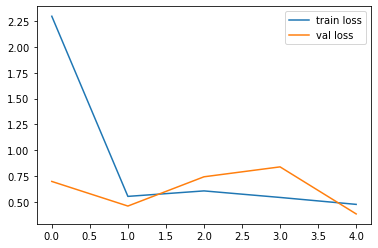

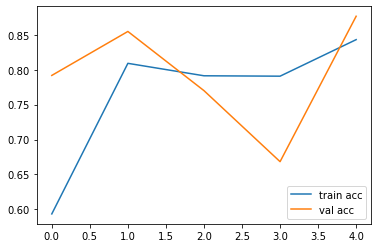

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [31]:

y_pred = model.predict(test_set)

In [32]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1,
       1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1,